In [871]:
include(joinpath(@__DIR__, "../src/main.jl")) 
include("EAX.jl")
using Plots


function Draw_tour(p1::Vector{Int}, depot::Vector{Float64}, Customers::Matrix{Float64})
    labels = Vector{Vector{String}}()

    x1 = [depot[1]]
    y1 = [depot[2]]
    labels1 = ["0"]
    for i in p1
        push!(x1, Customers[i,1])
        push!(y1, Customers[i,2])
        push!(labels1, string(i))
    end
    push!(x1, depot[1])
    push!(y1, depot[2])

    min_x = minimum(x1)
    min_y = minimum(y1)

    max_x = maximum(x1)
    max_y = maximum(y1)

    magnify = 0.2
    min_x = min_x - magnify*(max_x-min_x)
    max_x = max_x + magnify*(max_x-min_x)
    min_y = min_y - magnify*(max_y-min_y)
    max_y = max_y + magnify*(max_y-min_y)
    tit = "tsp"
    p = plot(x1, y1, marker =:circle, title = tit, label = "tour", xlim=(min_x, max_x), ylim=(min_y, max_y))

    annotate!.(x1[1:length(x1)-1]*1.02, y1[1:length(y1)-1]*1.02, text.(labels1, :left,8))
    return p
end

Draw_tour (generic function with 1 method)

In [873]:
closenodes = Find_Closeness(T, 0.3);

29369.40704674831
199


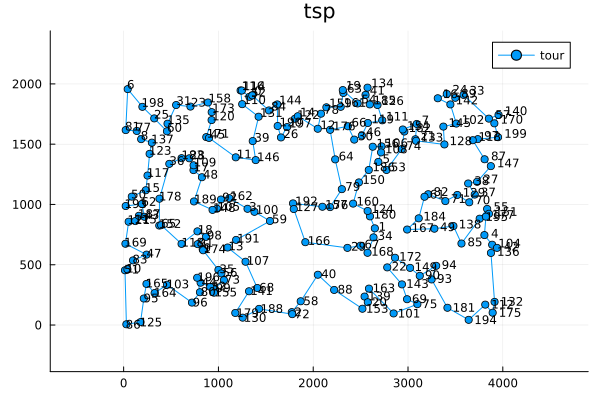

In [890]:
sample_name = :kroA200
n = 199
tsp = readTSPLIB(sample_name)
Nodes = tsp.nodes[1:n+1, :]
depot = Nodes[1, :]
Customers = Nodes[2:n+1, :]
T = Calculate_distance_matrices_TSPLIB(1, Nodes)

p1, obj = find_tsp_tour1(T[1:n+1, 1:n+1])
p2, p3, p4 = find_tsp_tour2(T[1:n+1, 1:n+1])

# p1 = [78,159,161,63,19,54,41,134,185,126,119,46,111,154,182,7,21,133,128,145,102,142,16,24,89,33,57,140,170,199,97,113,87,147,27,37,70,38,129,71,61,53,186,150,160,124,180,1,34,168,67,29,40,166,127,192,157,76,79,64,30,66,176,144,190,26,14,12,156,5,108,106,74,82,184,167,49,138,85,195,55,151,177,4,104,42,136,132,175,112,194,181,93,94,90,149,143,69,75,101,172,22,163,139,20,153,88,58,2,72,188,130,179,141,68,107,191,59,100,3,84,122,197,131,39,146,11,162,92,105,148,189,48,17,109,28,183,36,178,65,152,47,118,18,98,91,9,174,13,35,56,73,99,155,32,44,196,80,96,103,164,165,95,125,86,51,10,83,169,121,115,187,43,62,193,50,15,117,123,137,8,77,81,6,198,25,60,135,31,23,158,173,120,171,45,110,116,114,52]
println(find_tour_length(p1, T))
println(length(Set(p1)))
Draw_tour(p1, depot, Customers)



In [891]:
function closenodes_for_crossover(T::Matrix{Float64}, h::Float64)
    n_nodes = size(T)[1] - 2
    num = Int(ceil(h * n_nodes))
    ClosenessT = zeros(Int, n_nodes+1, num)
    for i = 1:n_nodes+1
        a = copy(T[i, 1:n_nodes+1])
        b = sortperm(a)
        ClosenessT[i, :] = b[2:num+1] .- 1
    end
    return ClosenessT
end

closenodes_for_crossover (generic function with 1 method)

29928.061935606387
199


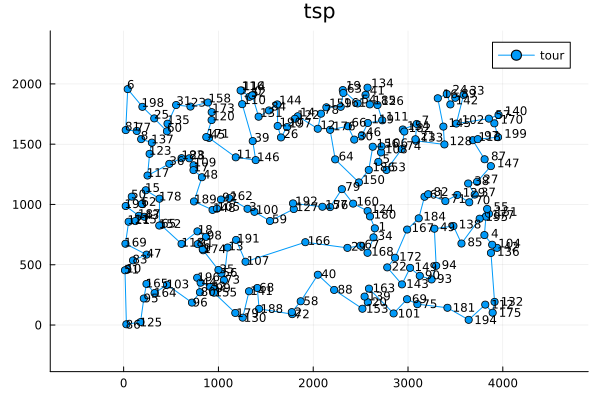

In [892]:
# p3 = [30,46,5,82,61,184,167,49,138,85,195,55,151,177,4,104,42,136,132,175,112,194,181,93,94,90,149,172,22,143,69,75,101,163,139,20,153,88,40,58,2,72,188,130,179,141,68,59,100,3,52,114,116,110,45,171,120,173,158,23,31,135,60,25,198,6,81,77,8,137,123,117,15,50,193,62,43,187,115,121,169,83,10,51,86,125,95,165,164,103,96,80,196,44,32,155,99,73,56,35,107,191,13,174,9,91,98,18,118,47,152,65,178,36,183,28,109,17,48,189,148,105,92,162,11,146,39,131,84,190,26,197,12,176,66,64,79,76,157,192,127,166,29,67,168,34,1,180,124,160,150,186,53,71,129,38,70,37,27,147,87,113,97,199,170,140,57,33,89,24,16,142,102,145,128,133,21,7,154,182,74,108,106,156,119,111,126,185,134,41,54,19,63,161,159,78,14,122,144]
println(find_tour_length(p2, T))
println(length(Set(p2)))
Draw_tour(p2, depot, Customers)

88615.49614545757
531
531


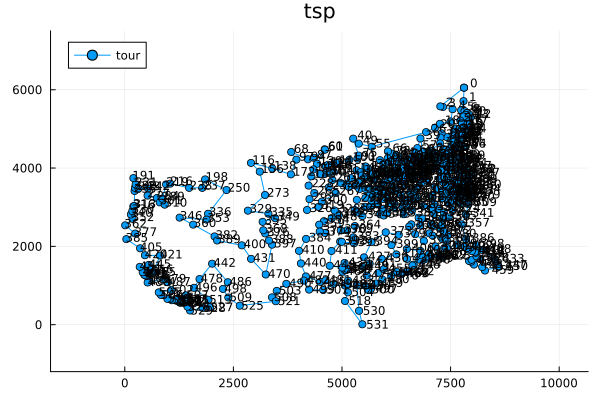

In [849]:
# p3 = shuffle([i for i=1:n])
for i = 1:100
    c = eax_1ab(p1, p2, T)
    if length(c) != 531
        println(i)
        break
    end
end

# c = Crossover_HX(T, p1, p3, n)
println(find_tour_length(c, T))
println(length(c))
println(length(Set(c)))
Draw_tour(c, depot, Customers)

In [899]:
include("EAX.jl")
closenodes = Find_Closeness(T, 0.3);
@time begin
    c = eax_1ab_fast(p1, p2, T, closenodes)
end

  0.064989 seconds (111.39 k allocations: 13.325 MiB, 90.28% compilation time)


199-element Vector{Int64}:
  52
 114
 116
 110
 131
  39
 146
  11
  17
  48
 189
 148
 105
   ⋮
  63
 161
 159
  78
  12
  14
 122
 197
  26
 190
 144
  84

In [895]:
@time begin
    c = eax_rand(p1, p2, T)
end

  0.003241 seconds (25.76 k allocations: 2.047 MiB)


199-element Vector{Int64}:
  52
 114
 116
 110
 131
  39
 146
  11
  45
 171
 120
 173
 158
   ⋮
  63
 161
 159
  78
  12
  14
 122
 197
  26
 190
 144
  84

In [900]:
@time begin
    c = eax_1ab(p1, p2, T)
end

  0.002910 seconds (25.74 k allocations: 2.022 MiB)


199-element Vector{Int64}:
  52
 114
 116
 110
 131
  39
 146
  11
  45
 171
 120
 173
 158
   ⋮
  63
 161
 159
  78
  12
  14
 122
 197
  26
 190
 144
  84

In [802]:
include("EAX.jl")
AB_Cycles, EA = find_AB_cycles(p1, p2)
select_effective_cycles(AB_Cycles)
Eset = form_Eset_rand(AB_Cycles)
solutions = generate_intermediate_solution(EA, Eset)
subtours = separate_subtours(solutions)
temp = deepcopy(subtours)
new_tour = modify_intermediate_solution(subtours, T)
for i = 1:100
    AB_Cycles, EA = find_AB_cycles(p1, p2)
    select_effective_cycles(AB_Cycles)
    Eset = form_eset_1ab(AB_Cycles)
    subtours = generate_subtours_fast(p1, Eset)
    new_tour = modify_intermediate_solution(subtours, T)
    if length(new_tour) != 20
        println(i)
        break
    end
end
println(find_tour_length(new_tour, T))
println(length(Set(new_tour)))
Draw_tour(new_tour, depot, Customers)

LoadError: BoundsError: attempt to access 3-element Vector{Vector{Int64}} at index [0]

In [803]:
Eset

8-element Vector{abEdge}:
 abEdge((15, 8), true)
 abEdge((8, 4), false)
 abEdge((4, 11), true)
 abEdge((11, 10), false)
 abEdge((10, 1), true)
 abEdge((1, 19), false)
 abEdge((19, 20), true)
 abEdge((15, 20), false)

In [804]:
subtours

3-element Vector{Vector{Int64}}:
 [8, 9, 14, 4]
 [1, 2, 19]
 [20, 15]

In [812]:
for i in city 
    print(i," ")
end
println()
for i in pos
    print(i," ")
end

10 1 2 19 20 15 8 9 14 4 11 16 3 18 12 17 13 5 6 7 0 
21 2 3 13 10 18 19 20 7 8 1 11 15 17 9 6 12 16 14 4 5 

In [770]:
pos[10]+pos[0]

41

In [809]:
city = copy(p1)
push!(city, 0)
n = length(city)
pos = OffsetArray(zeros(Int, n), 0:n-1)
# pos = zeros(Int, n)
for i=1:n
    pos[city[i]] = i
end

dashed = Float64[]
connectors = Vector{Vector{Int}}()
for edge in Eset
    if edge.first
        if pos[edge.edge[1]] == n && pos[edge.edge[2]] == 1
            push!(dashed, (2*n+1)/2)
            
        elseif pos[edge.edge[2]] == n && pos[edge.edge[1]] == 1
            push!(dashed, (2*n+1)/2)
        else
            push!(dashed, (pos[edge.edge[1]]+pos[edge.edge[2]])/2)
        end
    else
        if pos[edge.edge[1]] < pos[edge.edge[2]]
            push!(connectors, [pos[edge.edge[1]], pos[edge.edge[2]]])
        else
            push!(connectors, [pos[edge.edge[2]], pos[edge.edge[1]]])
        end
    end
end

sort!(dashed)
push!(dashed, dashed[1])
println(dashed)
segments = Vector{Vector{Int}}()
for i=1:length(dashed)-1
    push!(segments, [Int(ceil(dashed[i])), Int(floor(dashed[i+1]))])
end
if segments[end][1] > n
    segments[length(segments)][1] = 1
end
segments

[1.5, 4.5, 6.5, 10.5, 1.5]


4-element Vector{Vector{Int64}}:
 [2, 4]
 [5, 6]
 [7, 10]
 [11, 1]

In [810]:
sort!(segments, by=x->x[1])

4-element Vector{Vector{Int64}}:
 [2, 4]
 [5, 6]
 [7, 10]
 [11, 1]

In [811]:
connectors

4-element Vector{Vector{Int64}}:
 [7, 10]
 [1, 11]
 [2, 4]
 [5, 6]

In [712]:
mutual_segments = intersect(segments, connectors)
subtours = Vector{Vector{Int}}()
for segment in mutual_segments
    subtour = Int[]
    for i=segment[1]:segment[2]
        push!(subtour, city[i])
    end
    push!(subtours, subtour)
end
subtours

1-element Vector{Vector{Int64}}:
 [1, 2, 19]

In [818]:
city = copy(p1)
push!(city, 0)
n = length(city)
pos = OffsetArray(zeros(Int, n), 0:n-1)
# pos = zeros(Int, n)
for i=1:n
    pos[city[i]] = i
end

dashed = Float64[]
connectors = Vector{Vector{Int}}()
for edge in Eset
    if edge.first
        if pos[edge.edge[1]] == n && pos[edge.edge[2]] == 1
            push!(dashed, (2*n+1)/2)
            
        elseif pos[edge.edge[2]] == n && pos[edge.edge[1]] == 1
            push!(dashed, (2*n+1)/2)
        else
            push!(dashed, (pos[edge.edge[1]]+pos[edge.edge[2]])/2)
        end
    else
        if pos[edge.edge[1]] < pos[edge.edge[2]]
            push!(connectors, [pos[edge.edge[1]], pos[edge.edge[2]]])
        else
            push!(connectors, [pos[edge.edge[2]], pos[edge.edge[1]]])
        end
    end
end

sort!(dashed)
push!(dashed, dashed[1])

segments = Vector{Vector{Int}}()
for i=1:length(dashed)-1
    push!(segments, [Int(ceil(dashed[i])), Int(floor(dashed[i+1]))])
end
if segments[end][1] > n
    segments[length(segments)][1] = 1
end
mutual_segments = intersect(segments, connectors)
subtours = Vector{Vector{Int}}()
for segment in mutual_segments
    subtour = Int[]
    for i=segment[1]:segment[2]
        push!(subtour, city[i])
    end
    push!(subtours, subtour)
end

setdiff!(segments, mutual_segments)
setdiff!(connectors, mutual_segments)
sort!(segments, by=x->x[1])
k = findfirst(x->x==reverse(segments[end]), connectors) 
    

if !isnothing(k)
    subtour = Int[]
    deleteat!(connectors, k)
    b, a = segments[end]
    for i=0:n+a-b
        p = i+b
        if p <= n
            push!(subtour, city[p])
        else
            push!(subtour, city[p-n])
        end
    end
    push!(subtours, subtour)
    pop!(segments)
end

while !isempty(connectors)
    subtour = Int[]
    a, b = segments[1]
    for i = a:b
        push!(subtour,city[i])
    end
    deleteat!(segments, 1)
    while true
        i = findfirst(x->x[1]==b, connectors)
        if isnothing(i)
            j = findfirst(x->x[2]==b, connectors)
            c = connectors[j][1]
            deleteat!(connectors, j)
        else
            c = connectors[i][2]
            deleteat!(connectors, i)
        end
        if c == a 
            push!(subtours, subtour)
            break
        end
        k = findfirst(x->x[1]==c, segments)
        if isnothing(k)
            k = findfirst(x->x[2]==c, segments)
            d = segments[k][1]
            if segments[k][1] > segments[k][2]
                for i = 0:n-d+c
                    p = c - i
                    if p > 0
                        push!(subtour, city[p])
                    else
                        push!(subtour, city[p+n])
                    end
                end
            else
                for i in reverse([l for l=segments[k][1]:segments[k][2]])
                    push!(subtour, city[i])
                end
            end
        else
            d = segments[k][2]
            if segments[k][1] > segments[k][2]
                for i = 0:n+d-c
                    p = c + i
                    if p <= n
                        push!(subtour, city[p])
                    else
                        push!(subtour, city[p-n])
                    end
                end
            else
                for i in [l for l=segments[k][1]:segments[k][2]]
                    push!(subtour, city[i])
                end
            end
        end
        deleteat!(segments, k)
        b = d
    end
end

1  11
11 16 3 18 12 17 13 5 6 7 0 10 

In [819]:
subtours

4-element Vector{Vector{Int64}}:
 [1, 2, 19]
 [20, 15]
 [8, 9, 14, 4]
 [11, 16, 3, 18, 12, 17, 13, 5, 6, 7, 0, 10]

In [774]:
for i in subtours[1]
    print(i," ")
end

15 20 8 9 14 4 11 16 3 18 12 17 13 5 6 7 0 2 19 1 10 

In [681]:
for i in subtours[1]
    print(i," ")
end

10 15 20 1 19 2 0 7 6 5 13 17 12 18 3 16 11 

In [668]:
length(subtours[1])

21

In [629]:
connectors

7-element Vector{Tuple{Int64, Int64}}:
 (1, 11)
 (3, 21)
 (2, 5)
 (2, 4)
 (1, 6)
 (7, 10)
 (9, 12)

In [519]:
findfirst(x->x[1]==8, connectors)

2

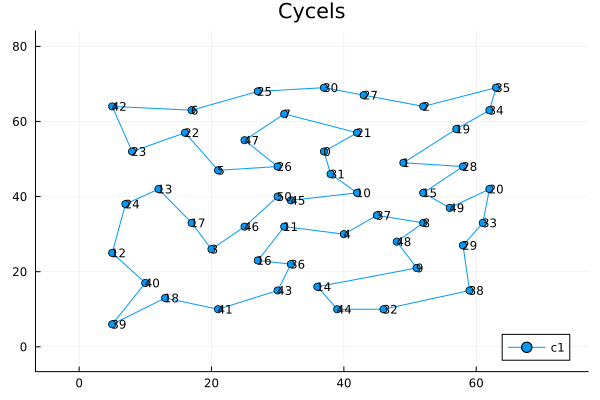

In [474]:
Draw_cycles(subtours, Nodes)

In [446]:
subtours[1][[10,11]]

2-element Vector{Int64}:
 10
  4

In [522]:
a = [1,2,3,100, 200]

b = deleteat(a, 4)

LoadError: UndefVarError: deleteat not defined

In [521]:
b

4-element Vector{Int64}:
   1
   2
   3
 200

In [159]:
a = [23,5,66,9]

a[2:end-1]

2-element Vector{Int64}:
  5
 66

In [392]:
function apply_cycle_to_tour(cycle::ABcycle, EA::Vector{Tuple{Int, Int}})
    cycle_A = Vector{Tuple{Int, Int}}()
    cycle_B = Vector{Tuple{Int, Int}}()
    for link in cycle.edges
        if link.first
            push!(cycle_A, link.edge)
        else
            push!(cycle_B, link.edge)
        end
    end
    temp = setdiff(EA, cycle_A)
    E_set = union(temp, cycle_B)
    return E_set
end

apply_cycle_to_tour (generic function with 2 methods)

In [15]:
cycle = AB_Cycles[1]
cycle_A = Vector{Tuple{Int, Int}}()
cycle_B = Vector{Tuple{Int, Int}}()
for link in cycle.edges
    if link.first
        push!(cycle_A, link.edge)
    else
        push!(cycle_B, link.edge)
    end
end


In [16]:
cycle_A

2-element Vector{Tuple{Int64, Int64}}:
 (20, 19)
 (1, 10)

In [14]:
EA_

21-element Vector{Tuple{Int64, Int64}}:
 (0, 7)
 (7, 6)
 (6, 5)
 (5, 13)
 (13, 17)
 (17, 12)
 (12, 18)
 (18, 3)
 (3, 16)
 (16, 11)
 (11, 4)
 (4, 14)
 (14, 9)
 (9, 8)
 (8, 15)
 (15, 20)
 (20, 19)
 (19, 2)
 (2, 1)
 (1, 10)
 (10, 0)

In [21]:
cycle_B

3-element Vector{Tuple{Int64, Int64}}:
 (15, 20)
 (19, 1)
 (10, 15)

In [22]:
cycle_A

2-element Vector{Tuple{Int64, Int64}}:
 (20, 19)
 (1, 10)

In [19]:
i = 1
index = 1
indices = Int[]
while index <= length(cycle_A)
    if EA_[i] == cycle_A[index]
        push!(indices, i)
        index += 1
    end
    i += 1
end

In [23]:
EA = copy(EA_)
deleteat!(EA, indices)

19-element Vector{Tuple{Int64, Int64}}:
 (0, 7)
 (7, 6)
 (6, 5)
 (5, 13)
 (13, 17)
 (17, 12)
 (12, 18)
 (18, 3)
 (3, 16)
 (16, 11)
 (11, 4)
 (4, 14)
 (14, 9)
 (9, 8)
 (8, 15)
 (15, 20)
 (19, 2)
 (2, 1)
 (10, 0)

In [24]:
cycle_B

3-element Vector{Tuple{Int64, Int64}}:
 (15, 20)
 (19, 1)
 (10, 15)

In [411]:
using LightGraphs

# Define the edges of the graph
edges = [(1,2), (2,3), (3,4), (4,5), (5,1), (2,5)]

# Create a graph object from the edges
g = SimpleGraph(length(edges))
for edge in edges
    add_edge!(g, edge[1], edge[2])
end

# Find all connected components (subtours) in the graph
subtours = connected_components(g)

# Print the subtours
for tour in subtours
    println("Subtour: ", tour)
end

Subtour: [1, 2, 3, 4, 5]
Subtour: [6]


In [410]:
using Pkg
Pkg.add("LightGraphs")

   Resolving package versions...
   Installed SimpleTraits ── v0.9.4
   Installed Inflate ─────── v0.1.3
   Installed ArnoldiMethod ─ v0.1.0
   Installed LightGraphs ─── v1.3.5
    Updating `C:\Users\sasanm\.julia\environments\v1.6\Project.toml`
  [093fc24a] + LightGraphs v1.3.5
    Updating `C:\Users\sasanm\.julia\environments\v1.6\Manifest.toml`
  [ec485272] + ArnoldiMethod v0.1.0
  [d25df0c9] + Inflate v0.1.3
  [093fc24a] + LightGraphs v1.3.5
  [699a6c99] + SimpleTraits v0.9.4
Precompiling project...
  ✓ Inflate
  ✓ SimpleTraits
  ✓ ArnoldiMethod
  ✓ GR_jll
  ✓ LightGraphs
  ✓ GR
  ✓ Plots
  7 dependencies successfully precompiled in 50 seconds (188 already precompiled, 66 skipped during auto due to previous errors)
  3 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


Draw_Eset (generic function with 1 method)

In [364]:
x,y = Nodes[2,:]

2-element Vector{Float64}:
 49.0
 49.0

In [203]:
temp1 = copy(p1)
temp2 = copy(p2)
push!(temp1, 0)
pushfirst!(temp1, 0)
push!(temp2, 0)
pushfirst!(temp2, 0)

EA = [(temp1[i], temp1[i+1]) for i in 1:length(temp1)-1]
EB = [(temp2[i], temp2[i+1]) for i in 1:length(temp2)-1];

Draw_cycles (generic function with 1 method)

In [205]:
EA

6-element Vector{Tuple{Int64, Int64}}:
 (0, 4)
 (4, 5)
 (5, 3)
 (3, 1)
 (1, 2)
 (2, 0)

In [143]:
@time begin
    collect(Iterators.flatten(EA))
end

  0.000009 seconds (2 allocations: 160 bytes)

8-element Vector{Int64}:
  7
  5
  5
  2
  4
 10
  1
  0

In [138]:
@time begin
    S = Int[]
    for a in EA
        push!(S, a[1])
        push!(S, a[2])
    end
    S = collect(Set(S))
end

  0.000039 seconds (17 allocations: 1.078 KiB)


7-element Vector{Int64}:
  5
  4
  0
  7
  2
 10
  1

In [ ]:
function Draw_tours(p1::Vector{Int}, depot::Vector{Float64}, Customers::Matrix{Float64})
    labels = Vector{Vector{String}}()

    x1 = [depot[1]]
    y1 = [depot[2]]
    labels1 = ["0"]
    for i in p1
        push!(x1, Customers[i,1])
        push!(y1, Customers[i,2])
        push!(labels1, string(i))
    end
    push!(x1, depot[1])
    push!(y1, depot[2])

    min_x = minimum(x1)
    min_y = minimum(y1)

    max_x = maximum(x1)
    max_y = maximum(y1)

    magnify = 0.2
    min_x = min_x - magnify*(max_x-min_x)
    max_x = max_x + magnify*(max_x-min_x)
    min_y = min_y - magnify*(max_y-min_y)
    max_y = max_y + magnify*(max_y-min_y)
    tit = "tsp"
    p = plot(x1, y1, marker =:circle, title = tit, label = "tour", xlim=(min_x, max_x), ylim=(min_y, max_y))

    annotate!.(x1[1:length(x1)-1]*1.02, y1[1:length(y1)-1]*1.02, text.(labels1, :left,8))
    return p
end

In [400]:
using PyPlot

function Draw_Eset(E_Set::Vector{Tuple{Int64, Int64}}, Nodes::Matrix{Float64})
# Define the coordinates of the endpoints for each line
lines = [[(0,0),(1,1)], [(1,1),(2,3)], [(2,3),(4,1)]]

    # Create a figure and axis object
    fig, ax = subplots()

    # Loop over the lines and plot each one
    for line in E_Set
        node1 = line[1]+1
        node2 = line[2]+1
        x1, y1 = Nodes[node1, :]
        x2, y2 = Nodes[node2, :]
        ax.plot([x1, x2], [y1, y2])
    end

    # Show the plot
    show()
end

function Draw_tour(p1::Vector{Int}, depot::Vector{Float64}, Customers::Matrix{Float64})
    labels = Vector{Vector{String}}()

    x1 = [depot[1]]
    y1 = [depot[2]]
    labels1 = ["0"]
    for i in p1
        push!(x1, Customers[i,1])
        push!(y1, Customers[i,2])
        push!(labels1, string(i))
    end
    push!(x1, depot[1])
    push!(y1, depot[2])

    min_x = minimum(x1)
    min_y = minimum(y1)

    max_x = maximum(x1)
    max_y = maximum(y1)

    magnify = 0.2
    min_x = min_x - magnify*(max_x-min_x)
    max_x = max_x + magnify*(max_x-min_x)
    min_y = min_y - magnify*(max_y-min_y)
    max_y = max_y + magnify*(max_y-min_y)
    tit = "tsp"
    p = plot(x1, y1, marker =:circle, title = tit, label = "tour", xlim=(min_x, max_x), ylim=(min_y, max_y))

    annotate!.(x1[1:length(x1)-1], y1[1:length(y1)-1], text.(labels1, :left,8))
    return p
end

function Draw_cycles(cycles::Vector{Vector{Int}}, Nodes::Matrix{Float64})

    x = Vector{Vector{Float64}}()
    y = Vector{Vector{Float64}}()
    labels = Vector{Vector{String}}()

    min_x = Inf
    max_x = 0.0
    min_y = Inf
    max_y = 0.0
    for cycle in cycles
        x1 = Float64[]
        y1 = Float64[]
        labels1 = String[]
        for i in cycle
            push!(x1, Nodes[i+1,1])
            push!(y1, Nodes[i+1,2])
            push!(labels1, string(i))
        end

        push!(x, x1)
        push!(y, y1)
        push!(labels, labels1)
        if minimum(x1) < min_x
            min_x = minimum(x1)
        end
        if minimum(y1) < min_y
            min_y = minimum(y1)
        end
        if maximum(x1) > max_x
            max_x = maximum(x1)
        end
        if maximum(y1) > max_y
            max_y = maximum(y1)
        end
    end
    magnify = 0.2
    min_x = min_x - magnify*(max_x-min_x)
    max_x = max_x + magnify*(max_x-min_x)
    min_y = min_y - magnify*(max_y-min_y)
    max_y = max_y + magnify*(max_y-min_y)
    tit = "Cycels"
    p = plot(x[1], y[1], marker =:circle, title = tit, label = "c1", xlim=(min_x, max_x), ylim=(min_y, max_y))
    for i=1:length(x)
        annotate!.(x[i][1:length(x[i])], y[i][1:length(y[i])], text.(labels[i], :left,8))
    end
    for i=2:length(x)
        p = plot!(x[i], y[i], marker =:circle, label = "c"*string(i))
    end 
    return p
end

# function Draw_Eset(E_Set::Vector{Tuple{Int64, Int64}}, Nodes::Matrix{Float64})

Draw_cycles (generic function with 1 method)

In [857]:
a = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [860]:
typeof(a) == Vector{Int}

true